In [1]:
cd ../src

/home/richard/Desktop/software/upload/epicluster-results/src


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic4_lownoise.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_1_R.csv')

# save results
results_synth1 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=32.55498157317194
Iter=100, Rhat=11.508596692899648
Iter=150, Rhat=6.334713548947077
Iter=200, Rhat=3.7898576193789197
Iter=250, Rhat=2.4680253386490802
Iter=300, Rhat=1.4410153879954897
Iter=350, Rhat=1.1417602023664348
Iter=400, Rhat=1.004377271831623
Converged 400 1.004377271831623


In [5]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic5_highnoise.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_2_R.csv')

# save results
results_synth2 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=25.780006329627067
Iter=100, Rhat=11.764115475628367
Iter=150, Rhat=5.1708629586729815
Iter=200, Rhat=2.956811446920399
Iter=250, Rhat=1.822746023878282
Iter=300, Rhat=1.3612133348576625
Iter=350, Rhat=1.1690722476899258
Iter=400, Rhat=1.0399010368291393
Iter=450, Rhat=1.0147939187680128
Iter=500, Rhat=1.0265705601225892
Iter=550, Rhat=1.0227755151304803
Iter=600, Rhat=1.017097108127042
Iter=650, Rhat=1.0151232200091438
Iter=700, Rhat=1.0277061960949203
Iter=750, Rhat=1.0739941970853757
Iter=800, Rhat=1.0812958451734496
Iter=850, Rhat=1.0274465730064601
Iter=900, Rhat=1.020187439994588
Iter=950, Rhat=1.0168942897171773
Iter=1000, Rhat=1.0432922917943057
Iter=1050, Rhat=1.0314582438400404
Iter=1100, Rhat=1.0359867862535412
Iter=1150, Rhat=1.0380268346211468
Iter=1200, Rhat=1.0410575617677906
Iter=1250, Rhat=1.0323549303258557
Iter=1300, Rhat=1.030776132474239
Iter=1350, Rhat=1.020987511757293
Iter=1400, Rhat=1.0140008704938854
Iter=1450, Rhat=1.0243873134118364
Iter=1500, 

In [6]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic6_sine.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_3_R.csv')

# save results
results_synth3 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=24.755299863487828
Iter=100, Rhat=12.26392496560652
Iter=150, Rhat=6.616873167492004
Iter=200, Rhat=4.292285859186169
Iter=250, Rhat=2.5919656810877907
Iter=300, Rhat=2.6204693818674634
Iter=350, Rhat=2.7849355161040754
Iter=400, Rhat=2.0348004890557276
Iter=450, Rhat=1.9344505055471752
Iter=500, Rhat=1.6642344372516424
Iter=550, Rhat=1.1885618794630612
Iter=600, Rhat=1.1101975997848954
Iter=650, Rhat=1.1302075046202682
Iter=700, Rhat=1.1497110878179269
Iter=750, Rhat=1.1107557926944633
Iter=800, Rhat=1.189445478689281
Iter=850, Rhat=1.2957733154724487
Iter=900, Rhat=1.2878897466118693
Iter=950, Rhat=1.4081891857131328
Iter=1000, Rhat=1.3071610164990701
Iter=1050, Rhat=1.2191812121091299
Iter=1100, Rhat=1.1565296353405021
Iter=1150, Rhat=1.1216362728836224
Iter=1200, Rhat=1.0859178584454525
Iter=1250, Rhat=1.0974784126338077
Iter=1300, Rhat=1.1029332248629486
Iter=1350, Rhat=1.1075902122196395
Iter=1400, Rhat=1.1439714523077724
Iter=1450, Rhat=1.1611789710243152
Iter=1500

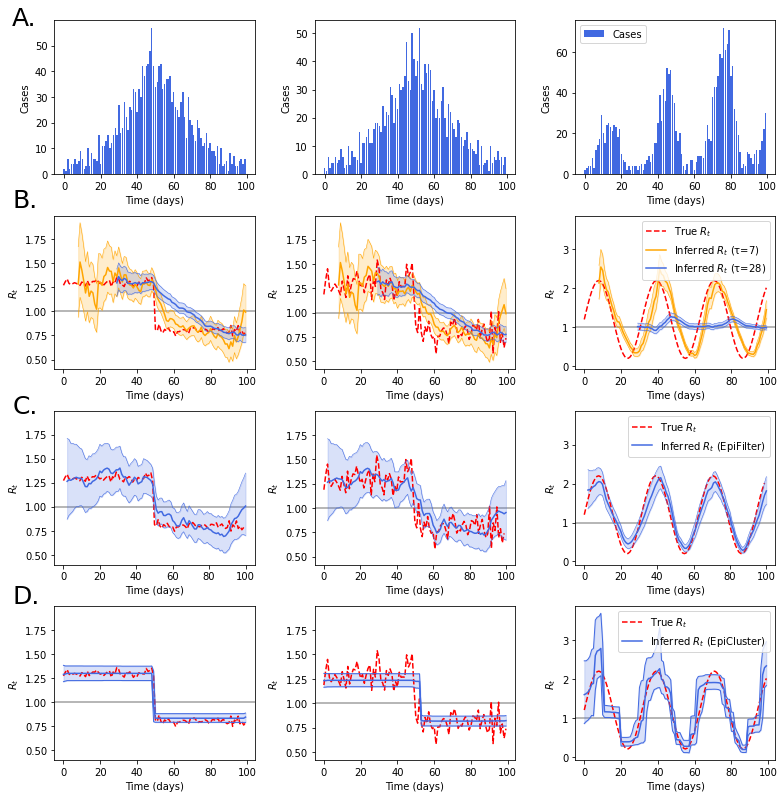

In [7]:
fig = plt.figure(figsize=(11,11))

num_exps = 3

for i in range(num_exps):
    
    do_legend = i==num_exps-1
    
    if i == 0:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth1
    elif i == 1:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth2
    elif i == 2:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth3
        
    ax = fig.add_subplot(4, num_exps, 1+i)

    x = np.arange(len(cases))
    ax.bar(x, cases, label='Cases', color='royalblue')

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//2:], z_chain[num_mcmc//2:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax)
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')

    x = np.arange(8, len(cases))
    ax.plot(x, intervals7['Mean'][len(w):], color='orange', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'][len(w):], intervals7['Upper bound CI'][len(w):], alpha=0.2, color='orange')
    ax.plot(x, intervals7['Lower bound CI'][len(w):], color='orange', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'][len(w):], color='orange', lw=0.5)
    
    x = np.arange(29, len(cases))
    ax.plot(x, intervals28['Mean'][len(w):], color='royalblue', label='Inferred $R_t$ (τ=28)')
    ax.fill_between(x, intervals28['Lower bound CI'][len(w):], intervals28['Upper bound CI'][len(w):], alpha=0.2, color='royalblue')
    ax.plot(x, intervals28['Lower bound CI'][len(w):], color='royalblue', lw=0.5)
    ax.plot(x, intervals28['Upper bound CI'][len(w):], color='royalblue', lw=0.5)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    
    
    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax)
    
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')


    x = epi_results['day'][1:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.02, .98, 'A.', fontsize=25)
fig.text(.02, .75, 'B.', fontsize=25)
fig.text(.02, .49, 'C.', fontsize=25)
fig.text(.02, .25, 'D.', fontsize=25)

plt.savefig('../notebooks/Figure3.pdf')
plt.show()
